# Fibonacci-to-music project

The aim of the project is to convert a particular version of the Fibonacci's sequence into music.

In [1]:
import pandas as pd
import numpy as np

from prettytable import *

In [2]:
# iterative Fibonacci generator up to n term
# final version implemented in fibo()

def fibonacci_iterative(n):
    sequence = [1, 1]
    i = 2
    while n>=2:
        sequence.append(sequence[i-1] + sequence[i-2])
        i += 1
        n += -1
    
    return sequence

In [3]:
# to convert numbers into notes
dict_note = {
    1:'DO',
    2:'RE',
    3:'MI',
    4:'FA',
    5:'SOL',
    6:'LA',
    7:'SI',
    8:'DO',
    9:'RE'
}

dict_accordi = {
    1:'DO',
    2:'RE',
    3:'MI',
    4:'FA',
    5:'SOL',
    6:'LA',
    7:'SI',
    8:'DO',
    9:'RE',
    10:'MI',
    11:'FA',
    12:'SOL',
    13:'LA',
    14:'SI',
    15:'DO',
    16:'RE',
    17:'MI',   # we just need this dictionary so far, probably
    18:'FA',
    19:'SOL',
    20:'LA',
    21:'SI',
}

# maggiore
dict_alt = {
    1:'maj7',
    2:'min7',
    3:'min7',
    4:'maj7',
    5:'7',
    6:'min7',
    7:'min7 (b5)',
    8:'maj7',
    9:'min7'
}

In [4]:
# we need to take into account also diesis and bemolle ('alterazioni')

tabella = pd.DataFrame()
for e in dict_note:
    tabella[dict_note[e]] = dict_note[e]
    
columns = ['DO', 'RE', 'MI', 'FA', 'SOL', 'LA', 'SI']

for e in columns:
    tabella[e] = np.zeros(7).astype(int)

# 1 = diesis
# -1 = bemolle
tabella['RE'] = [1,0,0,1,0,0,0]
tabella['MI'] = [1,1,0,0,1,1,0]
tabella['FA'] = [0,0,0,0,0,0,-1]
tabella['SOL'] = [0,0,0,1,0,0,0]
tabella['LA'] = [1,0,0,1,1,0,0]
tabella['SI'] = [1,1,0,1,1,1,0]

tabella.set_index(pd.Index(columns), inplace=True)

tabella

,DO,RE,MI,FA,SOL,LA,SI
DO,0,1,1,0,0,1,1
RE,0,0,1,0,0,0,1
MI,0,0,0,0,0,0,0
FA,0,1,0,0,1,1,1
SOL,0,0,1,0,0,1,1
LA,0,0,1,0,0,0,1
SI,0,0,0,-1,0,0,0


In [5]:
def alterazioni(nota, ton):
    # maggiore
    
    result = tabella.loc[ton, nota]
    if result == 1:
        return '#'
    elif result == 0:
        return ' '
    else:
        return 'b'

In [6]:
# converts the input sequence into a list of notes

def mapping_export(lista, lista_modulo, dict_note, dict_accordi, dict_alt):
    tabella_finale = PrettyTable()
    
    # Aggiungi le colonne alla tabella
    tabella_finale.field_names = ["Fibonacci", "Modulo", "Tonalità", "Accordo"]
    
    accordo = ' '
    for i, e in zip(lista, lista_modulo):
        if e >= 10:
            # l'elemento e viene diviso in prima cifra (nota) e seconda cifra (accordo), trasformandola in una stringa
            e_str = str(e)
            nota = int(e_str[0])
            
            # devo scalare gli accordi
            accordo = int(e_str[1]) + (nota-1)
            
            # se uno dei due valori è 0, printa solo 0 (pausa)
            if nota==0 or int(e_str[1])==0:
                tabella_finale.add_row([i, e, '--', '--'])
            else:
                stringa_accordo = dict_accordi[accordo] + alterazioni(dict_note[nota], dict_accordi[accordo]) + dict_alt[int(e_str[1])]
                tabella_finale.add_row([i, e, dict_note[nota], stringa_accordo])
                # dict_alt contiene maj7, min7, etc etc...
        else:
            # se uno dei due valori è 0, printa solo 0 (pausa)
            if i==0 or e==0:
                tabella_finale.add_row([i, e, '--', '--'])
            else:
                accordo = ' '
                tabella_finale.add_row([i, e, dict_note[e], accordo])
    
    # printa la tabella a tempo
    #for i in range(40):
    #    print(tabella_finale[i])
    #    time.sleep(0.5)
    
    tabella_finale.align["Tonalità"] = "l"
    tabella_finale.align["Accordo"] = "l"
    print(tabella_finale)
        
    return tabella_finale

In [7]:
# final function
# prints every note according to the particular version of the input sequence
# the original fibonacci's sequence can be modified by a multiplier or a modulo

def fibo(n=40, multiplier=1, modulo=100, prettyprint=True, export=False):
    # crea la sequenza standard fino al termine n
    lista_fibo = fibonacci_iterative(n)
    
    # applica il moltiplicatore
    if multiplier != 1:
        lista_moltiplicata = list(e * multiplier for e in lista_fibo)
        lista_fibo = lista_moltiplicata.copy()
        
    # applica il modulo
    lista_fibo_modulo =  []
    for e in lista_fibo:
        lista_fibo_modulo.append(e % modulo)
    
    # stampa le note in base alla sequenza con il modulo applicato
    if prettyprint == True:
        tabella_finale = mapping_export(lista_fibo, lista_fibo_modulo, dict_note, dict_accordi, dict_alt)
        if export == True:
            return tabella_finale
    else:
        mapping(lista_fibo, lista_fibo_modulo, dict_note, dict_accordi, dict_alt)

## Test

In [8]:
# pretty print
tabella_pandas = fibo(n=60, multiplier=1, modulo=100, export=True)

+---------------+--------+----------+--------------+
|   Fibonacci   | Modulo | Tonalità | Accordo      |
+---------------+--------+----------+--------------+
|       1       |   1    | DO       |              |
|       1       |   1    | DO       |              |
|       2       |   2    | RE       |              |
|       3       |   3    | MI       |              |
|       5       |   5    | SOL      |              |
|       8       |   8    | DO       |              |
|       13      |   13   | DO       | MI min7      |
|       21      |   21   | RE       | RE maj7      |
|       34      |   34   | MI       | LA#maj7      |
|       55      |   55   | SOL      | RE 7         |
|       89      |   89   | DO       | RE min7      |
|      144      |   44   | FA       | SIbmaj7      |
|      233      |   33   | MI       | SOL#min7     |
|      377      |   77   | SI       | LA#min7 (b5) |
|      610      |   10   | --       | --           |
|      987      |   87   | DO       | SI min7 

In [21]:
# pandas version
tabella_pandas

Fibonacci,Modulo,Tonalità,Accordo
1,1,DO,
1,1,DO,
2,2,RE,
3,3,MI,
5,5,SOL,
8,8,DO,
13,13,DO,MI min7
21,21,RE,RE maj7
34,34,MI,LA#maj7
55,55,SOL,RE 7


In [ ]:
# it saves the pandas dataframe as a csv
# pd.tabella_finale.to_csv('tabella_fibo_standard_pandas_60.csv')

## Visualizer

This function plots a visualization for the experiment.

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib import transforms

In [14]:
lista_fibo = fibonacci_iterative(70)

modulo = 100
lista_fibo_modulo =  []
for e in lista_fibo:
    lista_fibo_modulo.append(e % modulo)

In [17]:
def fibonacci_circle(lista_fibo_modulo, modulo):
    fig, ax = plt.subplots(figsize=(9,9), dpi=340)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.axis('off')

    # draw the circle
    Drawing_uncolored_circle = plt.Circle( (0.0, 0.0 ), 1.0, fill = False, lw=2)
    ax.set_aspect( 1 )
    ax.add_artist( Drawing_uncolored_circle )

    # polygon
    # the polygon is needed to draw the ticks on the circle
    n = modulo
    r = 1  # raggio del cerchio che contiene il poligono
    x, y = np.cos(np.arange(n) * 2 * np.pi / n), np.sin(np.arange(n) * 2 * np.pi / n)
    xy = np.column_stack([x, y])  # this is the interesting output
    #polygon = Polygon(xy, edgecolor='r', facecolor='none', animated=True)    # if you want to draw the polygon
    #ax.add_patch(polygon)

    # creates the the path of the modulo
    # for every element in lista_fibo_modulo, it creates a couple of points which are connected by a line
    for i in range(len(lista_fibo_modulo[:60])-2):   # first 60 numbers
        x = xy[lista_fibo_modulo[i]]
        y = xy[lista_fibo_modulo[i+1]]
        path = np.column_stack([x, y])
        polygon = Polygon(path.T, edgecolor='k', facecolor='none', antialiased=True, lw=2)   # path is transposed
        ax.add_patch(polygon)
        
    
    plt.show()
    
    return xy

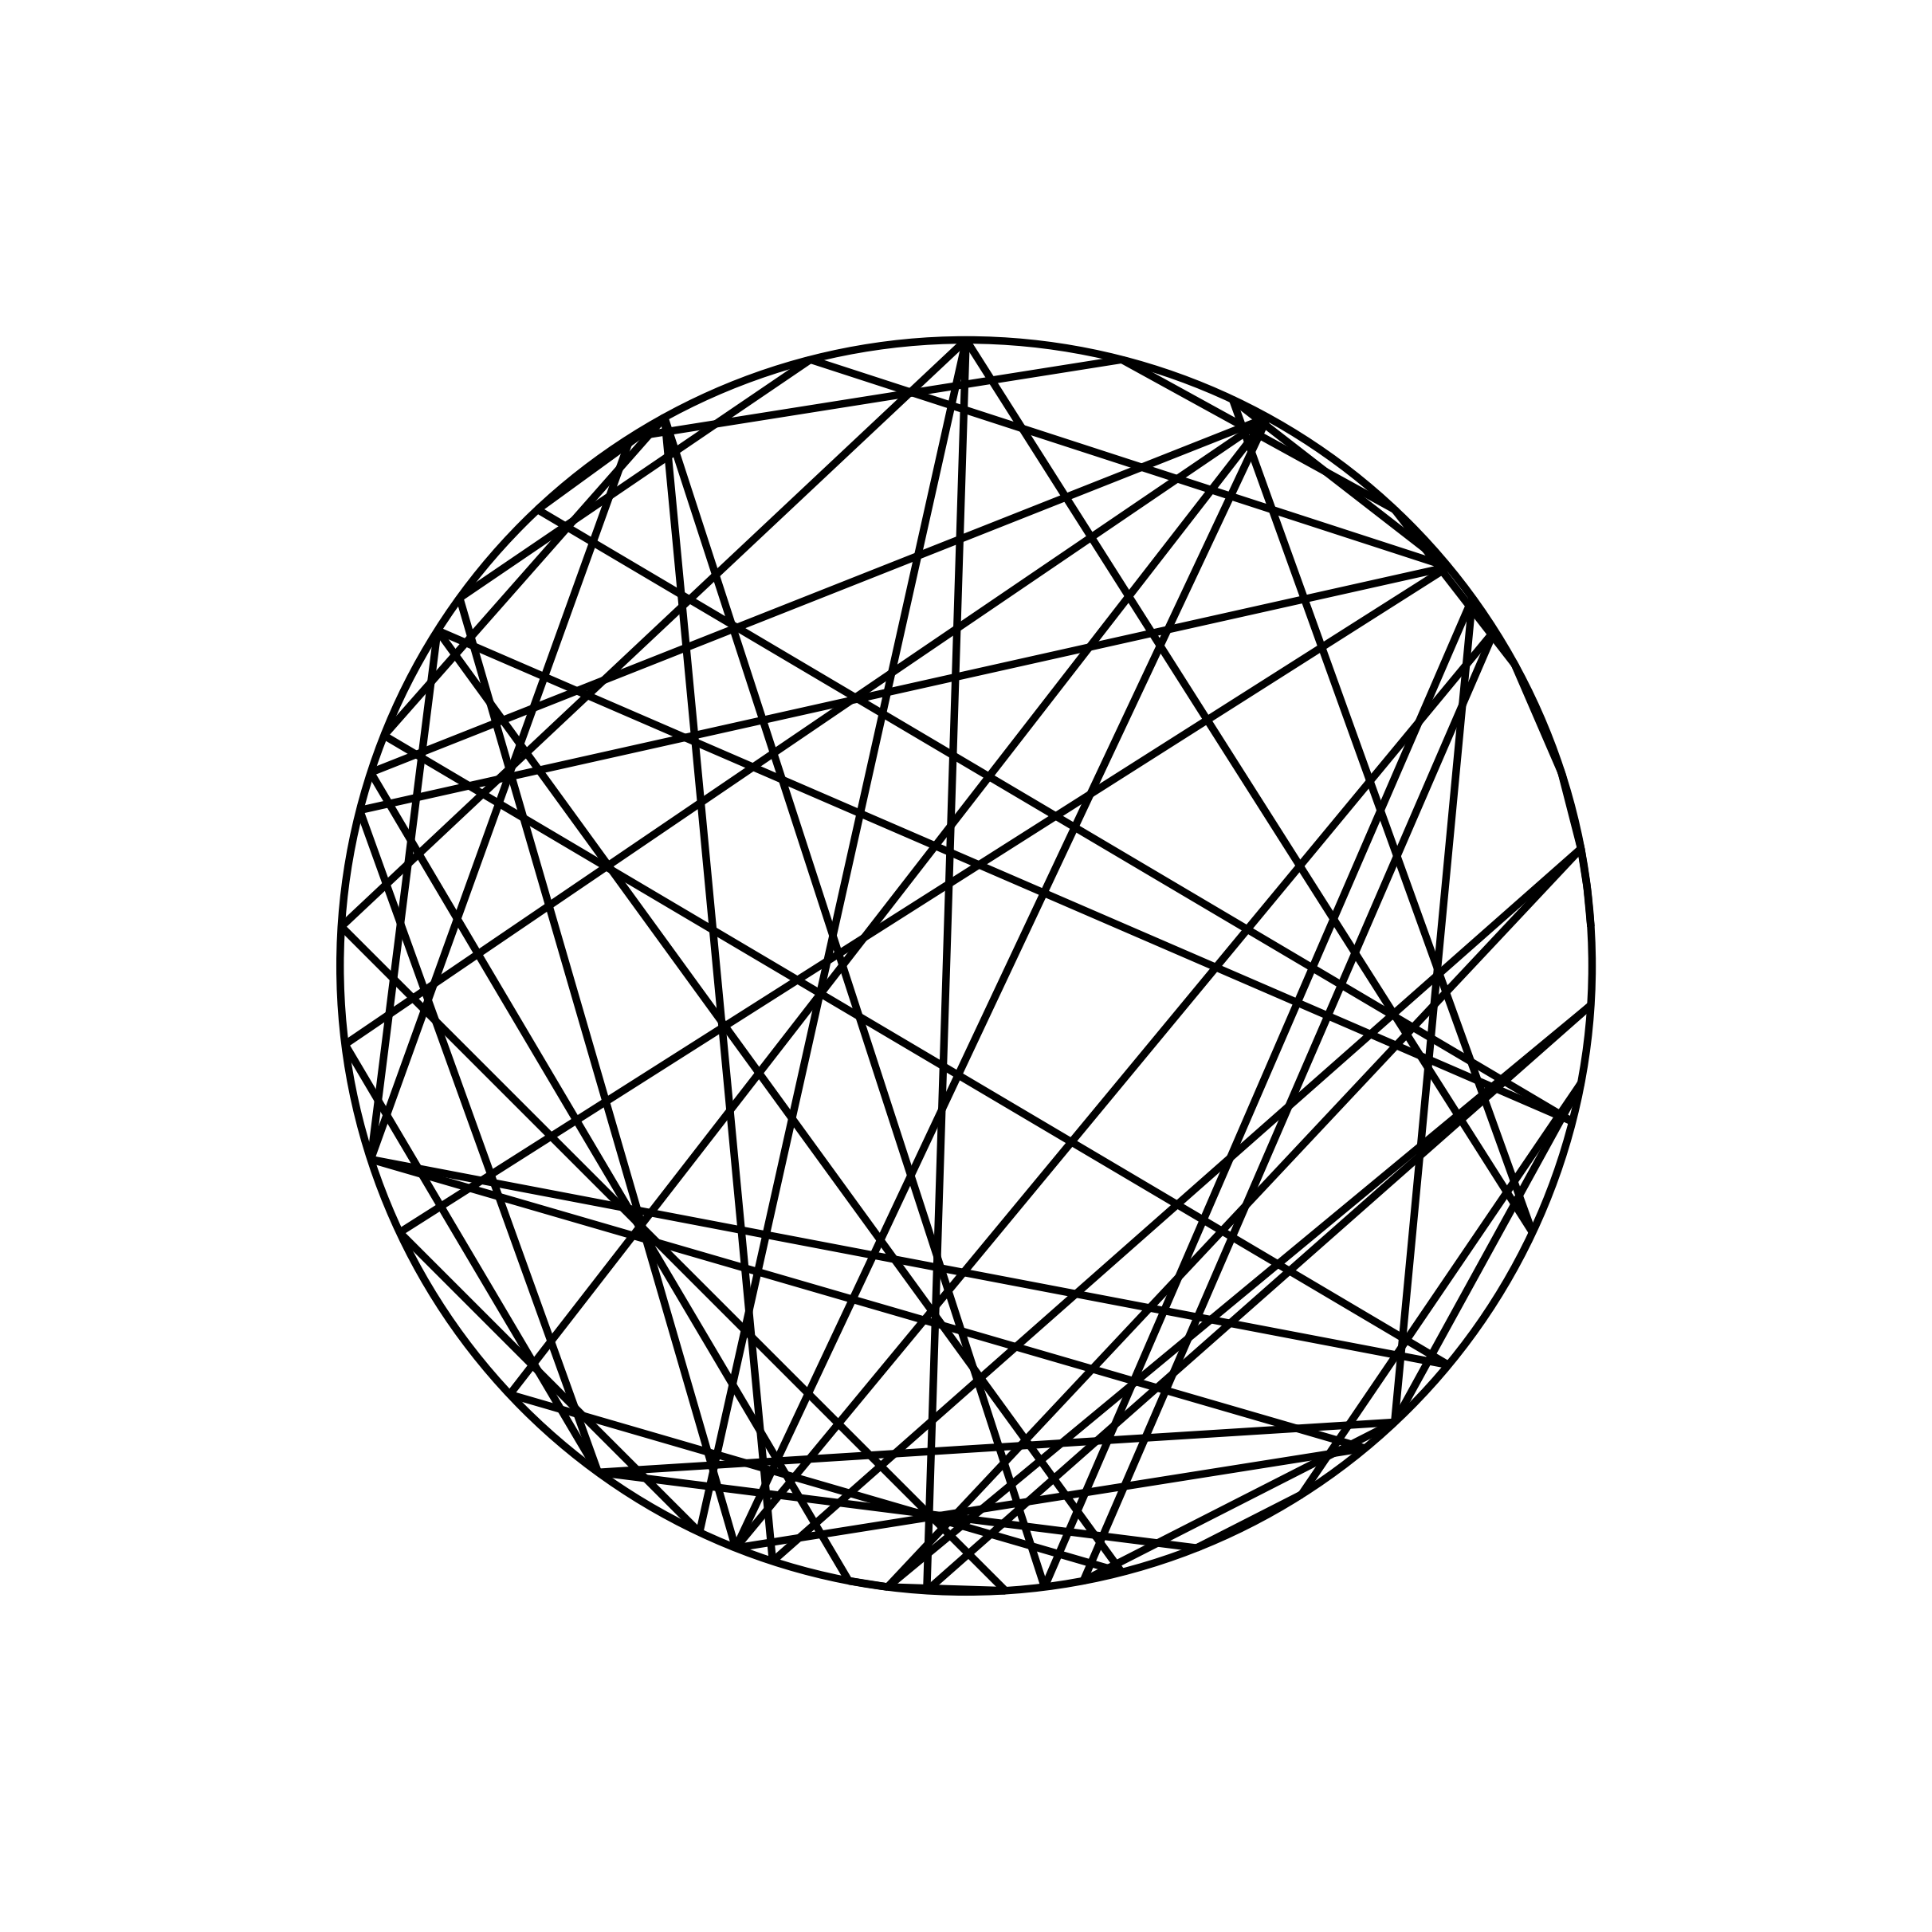

In [18]:
xy = fibonacci_circle(lista_fibo_modulo, modulo)

In [ ]:
# This version creates the frames for the GIF

def fibonacci_circle_PROVA(lista_fibo_modulo, modulo):
    for j in range(70):
        fig, ax = plt.subplots(figsize=(9,9), dpi=340, clear=True)
        plt.xlim(-1.5, 1.5)
        plt.ylim(-1.5, 1.5)
        plt.axis('off')

        # draw the circle
        Drawing_uncolored_circle = plt.Circle( (0.0, 0.0 ), 1.0, fill = False, lw=2)
        ax.set_aspect( 1 )
        ax.add_artist( Drawing_uncolored_circle )

        # polygon
        # the polygon is needed to draw the ticks on the circle
        n = modulo
        r = 1  # raggio del cerchio che contiene il poligono
        x, y = np.cos(np.arange(n) * 2 * np.pi / n), np.sin(np.arange(n) * 2 * np.pi / n)
        xy = np.column_stack([x, y])  # this is the interesting output
        #polygon = Polygon(xy, edgecolor='r', facecolor='none', animated=True)    # if you want to draw the polygon
        #ax.add_patch(polygon)

        # creates the the path of the modulo
        # for every element in lista_fibo_modulo, it creates a couple of points which are connected by a line
        for i in range(len(lista_fibo_modulo[:j])-2):   # first j numbers
            x = xy[lista_fibo_modulo[i]]
            y = xy[lista_fibo_modulo[i+1]]
            path = np.column_stack([x, y])
            
            # per colorare l'ultimo segmento aggiunto di rosso
            if i == len(lista_fibo_modulo[:j])-3:
                polygon = Polygon(path.T, edgecolor='r', facecolor='none', antialiased=True, lw=2)   # path is transposed
                ax.add_patch(polygon)
                # red marker
                plt.plot(path.T[1, 0], path.T[1, 1], marker='o', lw=2, color='r')
            else:
                polygon = Polygon(path.T, edgecolor='k', facecolor='none', antialiased=True, lw=2)   # path is transposed
                ax.add_patch(polygon)
        
        title = str(j)
        plt.savefig(title, dpi=340, transparent=True)
        plt.show()